**1. 텐서**
- 파이토치의 기본 단위

In [1]:
import torch
import numpy as np

In [2]:
x = torch.empty(5, 4)
print(x)

tensor([[ 3.7188e-36,  4.5406e-41,  3.6015e-31,  4.5406e-41],
        [ 3.8752e-03,  4.5405e-41,  3.0122e-31,  4.5406e-41],
        [ 3.8750e-03,  4.5405e-41, -1.8492e+31,  4.5405e-41],
        [ 3.8754e-03,  4.5405e-41, -1.8492e+31,  4.5405e-41],
        [ 3.8755e-03,  4.5405e-41,  1.2261e-38,  4.5406e-41]])


In [3]:
# 3*3크기의 일행렬
torch.ones(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [4]:
# 2행 크기의 영행렬
torch.zeros(2)

tensor([0., 0.])

In [5]:
# 5*6 크기의 무작위 행렬
torch.rand(5, 6)

tensor([[0.6007, 0.3356, 0.4379, 0.1452, 0.6381, 0.1730],
        [0.4362, 0.0241, 0.3537, 0.4009, 0.0423, 0.1427],
        [0.4542, 0.0392, 0.5892, 0.3973, 0.0029, 0.4293],
        [0.3641, 0.4368, 0.6187, 0.4317, 0.0332, 0.2185],
        [0.8646, 0.2753, 0.8200, 0.3731, 0.2355, 0.9526]])

list, numpy to Tensor

In [6]:
l = [13, 4] # 리스트 생성
r = np.array([4, 56, 7])
torch.tensor(l)

tensor([13,  4])

In [7]:
torch.tensor(r)

tensor([ 4, 56,  7])

텐서의 크기, 타입, 연산

In [8]:
x.size()[1]

4

In [10]:
x.size(0)

5

In [11]:
type(x)

torch.Tensor

In [12]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
x + y

tensor([[1.2954, 1.2358],
        [0.8511, 1.1263]])

In [13]:
torch.add(x, y)
y.add(x)

tensor([[1.2954, 1.2358],
        [0.8511, 1.1263]])

In [14]:
# 인플레이스 방식(아예 덮어씌우기)
y.add_(x)

tensor([[1.2954, 1.2358],
        [0.8511, 1.1263]])

In [15]:
y

tensor([[1.2954, 1.2358],
        [0.8511, 1.1263]])

텐서의 크기 변환

In [16]:
x = torch.rand(8, 8)
print(x.size())

torch.Size([8, 8])


In [17]:
# 크기를 바꿔주는 view 8 * 8 -> 64
a = x.view(64)
print(a.size())

torch.Size([64])


In [18]:
# -1은 원래 크기가 되게 하는 값 8 * 8 -> -1 * 4 * 4, 즉 4*4*4이다
b = x.view(-1,4,4)
print(b.size())

torch.Size([4, 4, 4])


텐서에서 넘파이 배열로 변환

In [19]:
x = torch.rand(8, 8)
y = x.numpy()
type(y)

numpy.ndarray

단일 텐서에서 값으로 변환

In [20]:
x = torch.ones(1)
print(x.item())

1.0


**2. 역전파**



모델 최적화 수단!!
미분 성질 + 연쇄 법칙 기반

requires_grad=True : 해당 텐서 기준 모든 연산 추적 -> 그래디언트 라고 하는 미분값들의 모임 계산!!

Pytorch -> 자동 미분 기능

In [21]:
x = torch.ones(2, 2, requires_grad=True)
y = x+1
z = 2*y**2
r = z.mean()
print("Result: ", r)

Result:  tensor(8., grad_fn=<MeanBackward0>)


r 기준 역전파 진행

*dr/dx*


In [22]:
# 역전파
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


**자동 미분 - 선형 회귀식**

In [23]:
from matplotlib import pyplot as plt

In [27]:
x = torch.FloatTensor(range(5)).unsqueeze(1)     # 1차원인 torch.size(5)를 2차원으로 늘린다
y = 2*x + torch.rand(5, 1)   # 인스턴스 5개, 변수 1개
num_features = x.shape[1]   # 변수의 개수 저장

In [26]:
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 선형식은 y = x*w+b

x, y(데이터) --> 변하지 않는 값이라 업뎃 필요 X!!

w, b  --> 역전파 통해서 최적의 값 찾기가 목표!!(requires_grad=True)

**경사 하강법**

In [28]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

In [30]:
loss_stack = []
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat = torch.matmul(x,w) + b
    loss = torch.mean((y_hat-y)**2)
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    #에포크가 100으로 나눠 떨어질 때마다 손실함수 값 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:0.045286957174539566
Epoch 100:0.04456264525651932
Epoch 200:0.04391986131668091
Epoch 300:0.04334944114089012
Epoch 400:0.04284322261810303
Epoch 500:0.042393963783979416
Epoch 600:0.041995253413915634
Epoch 700:0.041641488671302795
Epoch 800:0.04132745414972305
Epoch 900:0.041048821061849594
Epoch 1000:0.04080154746770859


In [31]:
# 최종 학습 w, b로 예측값 산출
with torch.no_grad():
    y_hat = torch.matmul(x,w) + b

손실함수와 회귀선 그래프

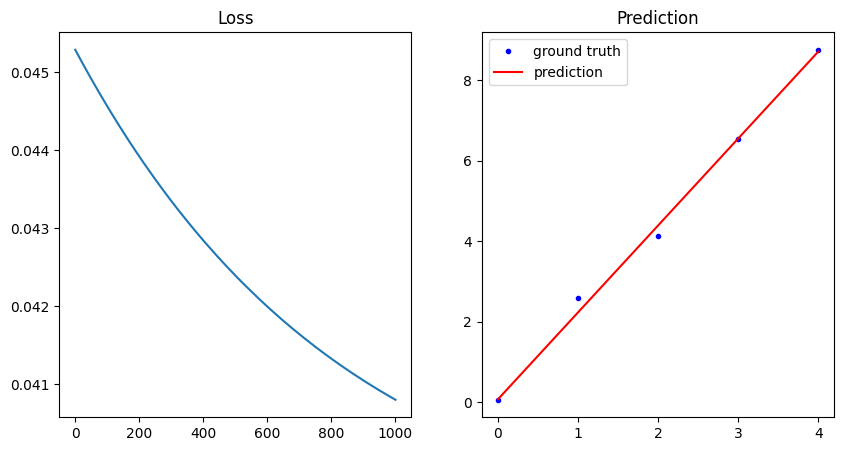

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()